# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

# Importing the Dataset

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head() #retrieving the first 5 records.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA/ Feature Engineering steps:

In [3]:
df.shape #Checking the shape of the data

(400, 11)

In [4]:
df.isnull().any() #checking for any missing values in the data

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
df_num=[]
df_cat=[]
for i in df.columns:
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        df_num.append(i)
    else:
        df_cat.append(i)
print(df_num)
print(df_cat)

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
['ShelveLoc', 'Urban', 'US']


### In the above block of code I am seaparating the categorical features and numerical features using for loop

In [6]:
for i in df_cat:
    print('Unique label in {} is: {}'.format(i,df[i].unique())) #obtaining the unique labels in the categorical feature.

Unique label in ShelveLoc is: ['Bad' 'Good' 'Medium']
Unique label in Urban is: ['Yes' 'No']
Unique label in US is: ['Yes' 'No']


### unique() function gives the unique labels in the categorical feature.

In [7]:
df['Urban']=np.where(df['Urban']=='Yes',1,0) #Converting the categorical feature values into 1's and 0's using the 
#np.where function.
df['US']=np.where(df['US']=='Yes',1,0)

### using np.where converting all the labels with yes as 1 in the categorical feature Undergrad and Urban to 1 and rest to 0.

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [9]:
map_={'Bad':0, 'Medium':1 ,'Good':2} #ordinal encoing by creating dictionary of bad,medium and good
df['ShelveLoc']=df['ShelveLoc'].map(map_) #mapping it to the actuall feature using map function
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


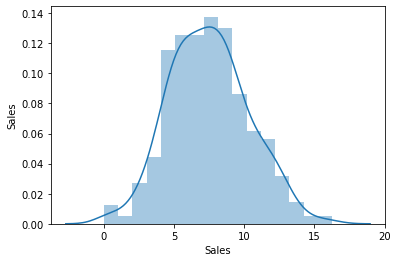

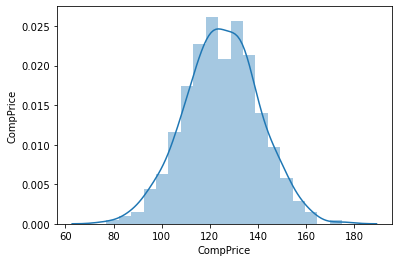

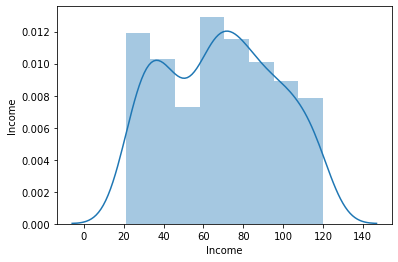

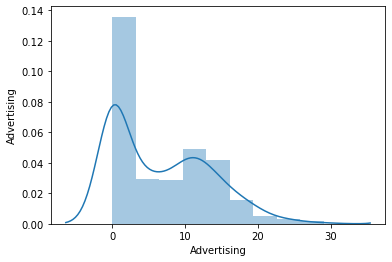

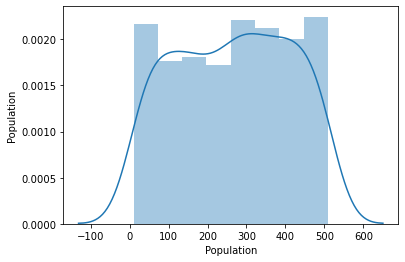

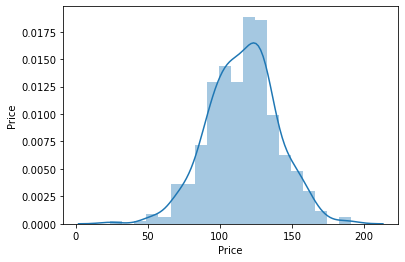

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


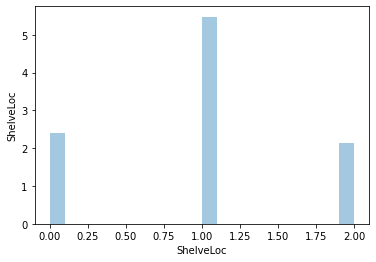

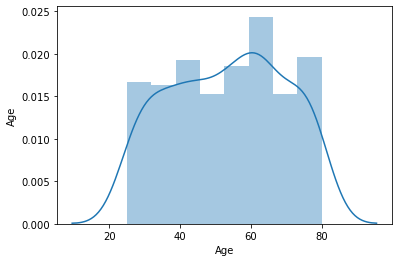

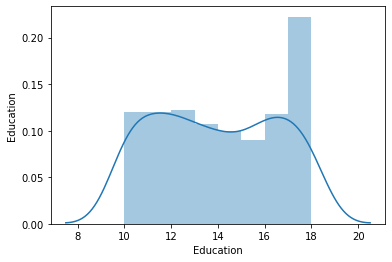

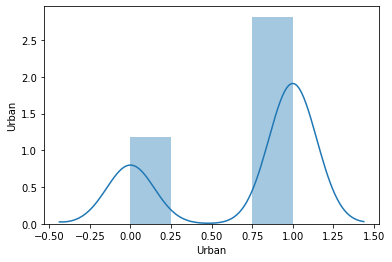

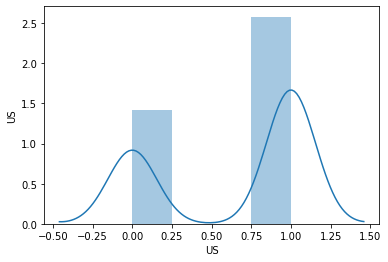

In [10]:
for i in df.columns:
    sns.distplot(df[i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.show()

In [12]:
print(df['Sales'].min())
print(df['Sales'].max())

0.0
16.27


### obtaining the maximum and minimum value from the sales category to convert into a categorical feature.

In [13]:
clean_data=df.copy()
clean_data['Sales']=(clean_data['Sales']>8.1)*1 #if the Taxable income is greater then 8.1 populate it
#with 1 else it is 0.
clean_data[['Sales']].head()

,Sales
0,1
1,1
2,1
3,0
4,0


In [13]:
y=clean_data[['Taxable.Income']].copy() #y is the target variable
y.head()

,Taxable.Income
0,1
1,1
2,1
3,1
4,1


In [14]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [15]:
X=df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']] #Independent feature.
y=clean_data['Sales'] #dependent feature

# Model Training:

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #Splitting the train and the test set.

In [17]:
clf=RandomForestClassifier(n_estimators=20,max_depth=4,random_state=0) #obtaining the instance of the Decision tree classifier.
#n_estimators=20 will create a random forest of 20 decsion trees. The max_depth is chosen as 4
clf.fit(X_train,y_train) #Fitting the instance on the train and the test dataset.

RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)

In [18]:
clf.estimators_ #estimators_ will give all the decision trees in the random forest.

[DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state

In [19]:
print(clf.score(X_train,y_train)) #train accuracy
print(clf.score(X_test,y_test)) #test accuracy

0.8966666666666666
0.77


### Unlike the Decision tree which causes the overfitting of the model , we use Random Forest which will create n different models with the records being row sampled and column sampled. This causes the model to train on different samples which will avoid overfitting.

# Visualising the Random Forest

[Text(473.5657894736842, 489.24, 'X[5] <= 1.5\ngini = 0.43\nsamples = 183\nvalue = [206, 94]'),
 Text(286.3421052631579, 380.52000000000004, 'X[0] <= 130.5\ngini = 0.364\nsamples = 151\nvalue = [191, 60]'),
 Text(176.21052631578948, 271.8, 'X[1] <= 99.5\ngini = 0.272\nsamples = 95\nvalue = [129, 25]'),
 Text(88.10526315789474, 163.08000000000004, 'X[0] <= 104.5\ngini = 0.176\nsamples = 82\nvalue = [120, 13]'),
 Text(44.05263157894737, 54.360000000000014, 'gini = 0.469\nsamples = 11\nvalue = [10, 6]'),
 Text(132.1578947368421, 54.360000000000014, 'gini = 0.112\nsamples = 71\nvalue = [110, 7]'),
 Text(264.3157894736842, 163.08000000000004, 'X[2] <= 16.5\ngini = 0.49\nsamples = 13\nvalue = [9, 12]'),
 Text(220.26315789473685, 54.360000000000014, 'gini = 0.375\nsamples = 9\nvalue = [9, 3]'),
 Text(308.36842105263156, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 9]'),
 Text(396.47368421052636, 271.8, 'X[4] <= 108.5\ngini = 0.461\nsamples = 56\nvalue = [62, 35]'),
 Text(352.4210

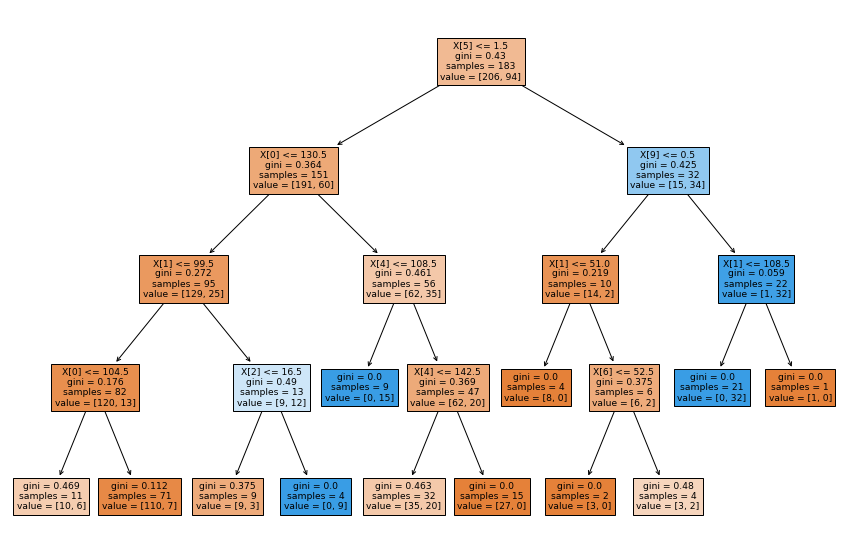

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[2],filled=True) #visualising the tree using plot_tree function from the module tree.
#clf.estimators_[2] will display the 3rd decision tree

# HyperParameter Tuning:

In [21]:
#No. of trees in the Random Forest:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
#No. of features to consider at every split
max_features=['auto','sqrt']
#Max no. of levels in the tree
max_depth=[2,10]
#Min. no. of samples required to split a node.
min_samples_split=[2,5]
#Min. no. of samples required at each leaf node.
min_samples_leaf=[1,2]
#Method of selecting samples for training each tree
bootstrap=[True,False]

In [22]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [23]:
clf = RandomForestClassifier() #Obtaining an instance of the RandomForestClassifier

In [24]:
rf_Grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4) #Obtaining the random search for the
#randomforestclassifier 

In [25]:
rf_Grid.fit(X_train, y_train) #fitting to the train and test data

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 260 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 666 tasks      | elapsed:   26.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   36.8s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [26]:
rf_Grid.best_params_ #Best parameters of the random search

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 33}

In [27]:
print(rf_Grid.score(X_train,y_train)) #training accuracy
print(rf_Grid.score(X_test,y_test)) #test accuracy

0.9866666666666667
0.8
